# PART3 パラメータをチューニングしてみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

C:\Users\mikam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv',header=None)   

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [5]:
trainX = train.iloc[:,0:17]

In [6]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [7]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [8]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [9]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [10]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [12]:
cross_validate(clf1,trainX,y,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)

{'fit_time': array([0.07579708, 0.07080936, 0.07380056, 0.06881547, 0.05884528]),
 'score_time': array([0.01097107, 0.01096964, 0.00997305, 0.02094412, 0.01795053]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73708019, 0.75909278]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162308, 0.74613685])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [14]:
clf2 = DT(max_depth=10,min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [16]:
cross_validate(clf2,trainX,y,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)

{'fit_time': array([0.27925444, 0.27925277, 0.2772584 , 0.28324413, 0.27225304]),
 'score_time': array([0.01296639, 0.01496005, 0.01495957, 0.0159564 , 0.01595759]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89240308, 0.88344359]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.88763037, 0.88561317])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [17]:
clf3 =DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [18]:
parameters ={'max_depth':[2,3,4,5,6,7,8,9,10]}

In [19]:
parameters ={'max_depth':list(range(2,11))}

In [20]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [22]:
gcv = GridSearchCV(clf3,parameters,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

## グリッドサーチの結果を見てみましょう
- cv_results_で結果を見る事が出来ます

In [23]:
gcv.cv_results_

{'mean_fit_time': array([0.10935082, 0.16246428, 0.20307536, 0.24018183, 0.26264181,
        0.27899241, 0.29993081, 0.30305181, 0.23743992]),
 'std_fit_time': array([1.18347870e-06, 1.24953270e-02, 1.39737189e-02, 2.06516383e-02,
        2.29575294e-02, 1.48425398e-02, 1.16875946e-02, 1.87471392e-02,
        3.87734674e-02]),
 'mean_score_time': array([0.02499461, 0.03124413, 0.02499347, 0.01176758, 0.01249752,
        0.01562152, 0.01249499, 0.00624671, 0.00937276]),
 'std_score_time': array([7.65259209e-03, 9.87932927e-03, 7.65292299e-03, 6.05031054e-03,
        6.24876180e-03, 2.11427682e-06, 6.24749678e-03, 7.65062588e-03,
        7.65282560e-03]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'

## cv_results_の中で重要な２つをみてみましょう
- cv_results_["mean_train_score"]とcv_results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [27]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [25]:
train_score

array([0.74831988, 0.81244475, 0.84413657, 0.85725938, 0.86925483,
       0.88595209, 0.89896026, 0.91022864, 0.92409553])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x1eba975fb08>,
 <a list of 8 Text xticklabel objects>)

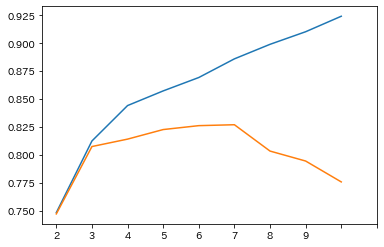

In [28]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[2,3,4,5,6,7,8,9])

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [29]:
gcv.best_params_

{'max_depth': 7}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [30]:
pred = gcv.predict_proba(testX)

In [31]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [32]:
sample[1] = pred

In [33]:
sample.to_csv('submit3_bank.csv',index=None,header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [34]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [43]:
parameters2 = {'max_depth':list(range(2,11)),'min_samples_leaf':[5,10,20,50,100,500]}
parameters2

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 10, 20, 50, 100, 500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [44]:
gcv2= GridSearchCV(clf4,parameters2,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]

4.最適なパラメータはなんだったか確かめてみよう

In [45]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [46]:
pred2 = gcv2.predict_proba(testX)

In [48]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [49]:
sample[1] = pred2

In [50]:
sample.to_csv('sbumit4_bank.csv',index=None,header=None)